<h1>Mall Customers Clustering</h1>

<h3>Table of Contents</h3>

<ol class="alert alert-block" style="background-color:#838996">
    <li>Understanding the Data</li>
    <li>Loading Packages</li>
    <li>Reading the Data</li>
    <li>Exploring Data</li>
    <li>Visualizing Data</li>
    <li>Preprocessing</li>
    <li>Training Model</li>
    <ol style="list-style:square">
        <li>K-Means</li>
        <li>Hierarchy</li>
        <li>DBSCAN</li>
    </ol>
    <li>Conclusion</li>
</ol>

<h2>Understanding the Data</h2>
<p>The dataset contains 200 customers with five columns:</p>
<ol style="list-style:circle">
    <li>CustomerID: Unique identifier</li>
    <li>Gender: Male or Female</li>
    <li>Age: Customer age in years</li>
    <li>Annual Income (k$): Income in thousands of dollars</li>
    <li>Spending Score (1-100): Mall-assigned score based on spending behavior</li>
</ol>
<p>These features provide the basis for segmenting customers based on their demographics and purchasing habits.</p>

<h2>Loading Packages</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.cm as cm
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

<h2>Reading the Data</h2>

In [2]:
data = pd.read_csv("data/Mall_Customers.csv")

<p><strong>Note:</strong> You can download the dataset from <a href="https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python">Kaggle Website.</a></p>

<h2>Exploring Data</h2>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h2>Visualizing Data</h2>

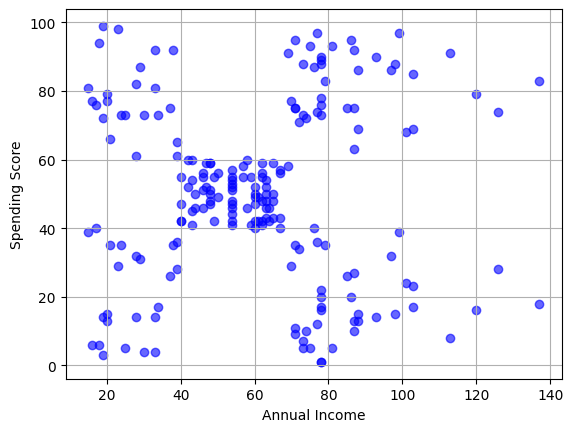

In [5]:
# Annual Income / Spending Score
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], c="blue", alpha=0.6)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid()
plt.show()

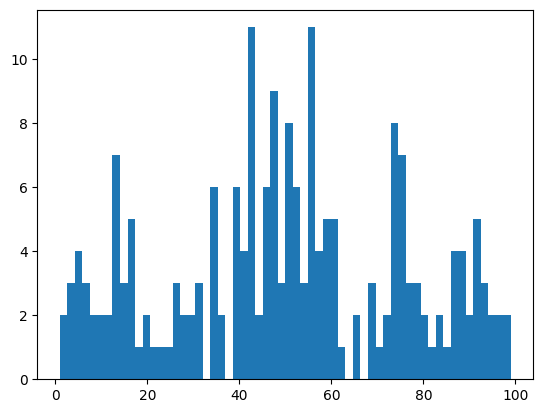

In [6]:
plt.hist(data["Spending Score (1-100)"], bins=60)
plt.show()

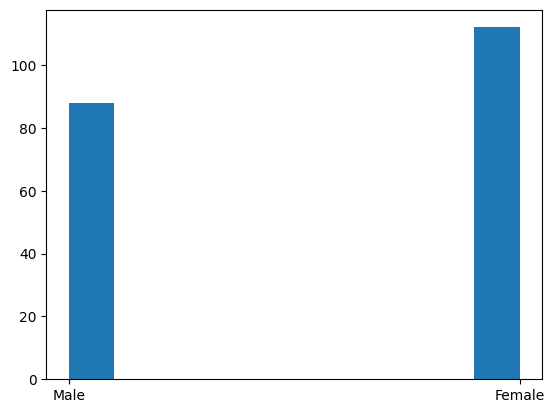

In [7]:
plt.hist(data["Gender"])
plt.show()

<h2>Preprocessing</h2>

In [8]:
# Remove CustomerID from dataset

data = data.drop("CustomerID", axis=1)

data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
# Changing Gender Labels

data["Gender"] = LabelEncoder().fit(["Male", "Female"]).transform(data["Gender"])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [10]:
# Normalizing Data

to_scale = ["Annual Income (k$)", "Spending Score (1-100)"]  # Columns to normalize
keep = ["Gender", "Age"]  # Columns to keep 

scaled = StandardScaler().fit_transform(data[to_scale])

X = np.concatenate([data[keep].values, scaled], axis=1)  # Combine
X[:5]

array([[ 1.        , 19.        , -1.73899919, -0.43480148],
       [ 1.        , 21.        , -1.73899919,  1.19570407],
       [ 0.        , 20.        , -1.70082976, -1.71591298],
       [ 0.        , 23.        , -1.70082976,  1.04041783],
       [ 0.        , 31.        , -1.66266033, -0.39597992]])

<h2>Training Model</h2>

<p>we use three methods to cluster data:</p>
<ol style="list-style:disc;">
    <li>K-Means</li>
    <li>Hierarchy</li>
    <li>DBSCAN</li>
</ol>

<h3>K-Means</h3>

In [11]:
# Modeling

kmeans = KMeans(init="k-means++", n_clusters= 5, n_init=12).fit(X)
kmeans_labels = kmeans.labels_
kmeans_labels[:5]

array([0, 0, 0, 0, 4])

In [12]:
data["kmeans_label"] = kmeans_labels
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_label
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,4


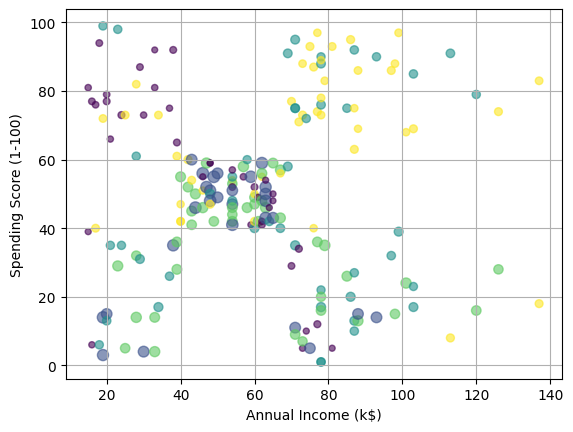

In [13]:
size = data["Age"]
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], s=size, c=kmeans_labels.astype(float), alpha=0.6)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid()
plt.show()

In [14]:
kmeans_score = silhouette_score(X, kmeans_labels)
print("Silhouette Score(K-Means):", kmeans_score)

Silhouette Score(K-Means): 0.5249511312427156


<h3>Hierarchy</h3>

In [15]:
# Distance

dist_matrix = euclidean_distances(X, X) 
print(dist_matrix)

[[ 0.          2.58041631  1.9085868  ... 13.74033277 13.83290338
  12.06657991]
 [ 2.58041631  0.          3.23712384 ... 11.79085998 12.19287959
  10.13363742]
 [ 1.9085868   3.23712384  0.         ... 13.02295848 12.90533127
  11.45714743]
 ...
 [13.74033277 11.79085998 13.02295848 ...  0.          2.21418015
   2.07324908]
 [13.83290338 12.19287959 12.90533127 ...  2.21418015  0.
   3.21986876]
 [12.06657991 10.13363742 11.45714743 ...  2.07324908  3.21986876
   0.        ]]


In [16]:
# Agglomerative

agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'complete').fit(dist_matrix)

agglom_labels = agglom.labels_
agglom_labels[:5]

C:\Users\homee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:588: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 0, 0, 0, 0], dtype=int64)

In [17]:
data["agglom_label"] = agglom_labels
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_label,agglom_label
0,1,19,15,39,0,0
1,1,21,15,81,0,0
2,0,20,16,6,0,0
3,0,23,16,77,0,0
4,0,31,17,40,4,0


C:\Users\homee\AppData\Local\Temp\ipykernel_4260\2045415151.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset["Annual Income (k$)"], subset["Spending Score (1-100)"], s=subset["Age"], c=color, label="cluster"+str(label), alpha=0.6)


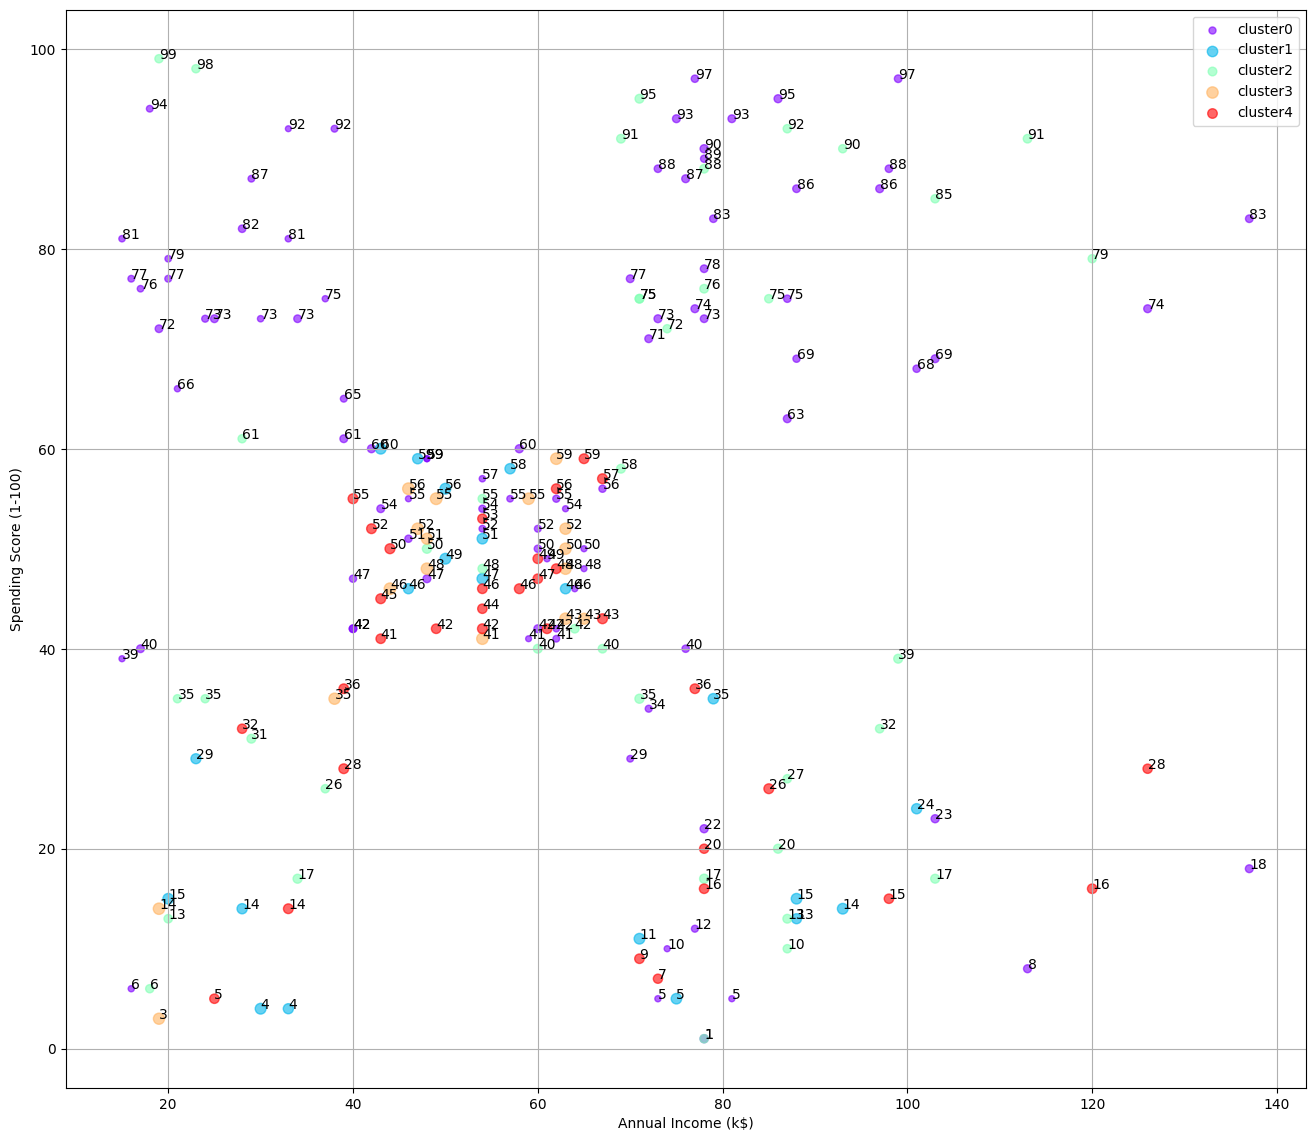

In [18]:
n_clusters = 5
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Figure
plt.figure(figsize=(16, 14))

for color, label in zip(colors, cluster_labels):
    subset = data[data["agglom_label"] == label]
    for x in subset.index:
        plt.text(subset["Annual Income (k$)"][x], subset["Spending Score (1-100)"][x], str(subset["Spending Score (1-100)"][x]))
    plt.scatter(subset["Annual Income (k$)"], subset["Spending Score (1-100)"], s=subset["Age"], c=color, label="cluster"+str(label), alpha=0.6)

plt.legend()
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid()
plt.show()

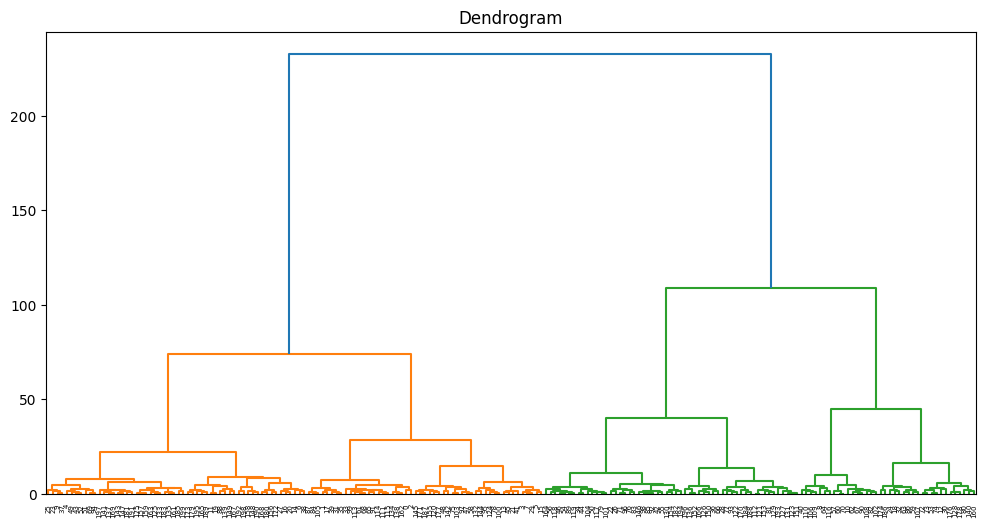

In [19]:
# Dendrogram

Z = linkage(X, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Dendrogram")
plt.show()

In [20]:
agglom_score = silhouette_score(X, agglom_labels)
print("Silhouette Score(Hierarchy):", agglom_score)

Silhouette Score(Hierarchy): 0.46961342639792647


<h3>DBSCAN</h3>

In [21]:
dbscan = DBSCAN(eps=1.2, min_samples=5).fit(X)

In [22]:
dbscan_labels = dbscan.labels_

dbscan_labels[:5]

array([-1,  0, -1,  0,  2], dtype=int64)

In [23]:
data["DBSCAN label"] = dbscan_labels
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_label,agglom_label,DBSCAN label
0,1,19,15,39,0,0,-1
1,1,21,15,81,0,0,0
2,0,20,16,6,0,0,-1
3,0,23,16,77,0,0,0
4,0,31,17,40,4,0,2


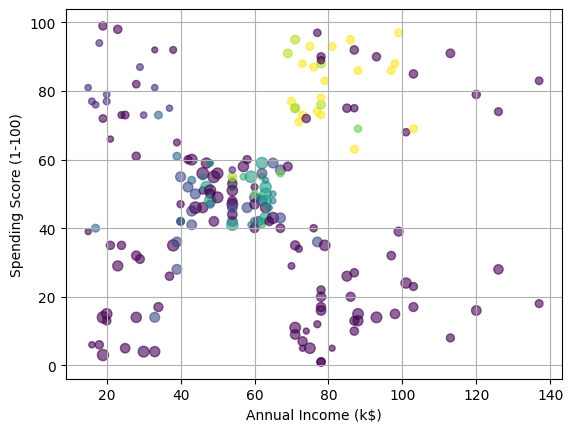

In [24]:
size = data["Age"]
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], s=size, c=dbscan_labels.astype(float), alpha=0.6)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid()
plt.show()

In [25]:
# Filtering Data
mask = dbscan_labels != -1

filtered_X = X[mask]
filtered_labels = dbscan_labels[mask]

dbscan_score = silhouette_score(filtered_X, filtered_labels)
print("Silhouette Score(DBSCAN):", dbscan_score)

Silhouette Score(DBSCAN): 0.5705722761115553


<h2>Conclusion</h2>

<p>Based on the Silhouette Scores, DBSCAN achieved the highest score (0.571), indicating it formed the most well-defined and separated clusters in this dataset. K-Means also performed well (0.524), producing clear groupings. Hierarchical clustering scored lower (0.470), showing less distinct cluster boundaries. Overall, DBSCAN appears to be the best choice for this customer segmentation task, effectively identifying dense groups and handling outliers.</p>